In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# read data and drop nan values (for some reason there are a bunch of rows of nans at the end of the raw data)
df = pd.read_csv('analytics_20191001_20211001.csv', skiprows=6).dropna()
# remove commas from number strings
df['Users'] = df['Users'].apply(lambda x: x.replace(',', ''))
# convert users column to integer
df['Users'] = df['Users'].astype(int)
# convert dates from float to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df

,Default Channel Grouping,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,Direct,2021-07-19,4020,"2,944","4,418",40.11%,5.60,0:03:15,4.05%,179.0,"$9,054.36"
1,Direct,2021-02-27,3496,"3,287","3,746",43.83%,4.33,0:02:28,0.13%,5.0,$157.25
2,Direct,2021-03-02,3337,"2,859","3,644",52.50%,3.93,0:02:29,0.22%,8.0,$441.28
3,Direct,2021-09-27,3337,"2,707","3,653",49.33%,4.69,0:03:03,1.89%,69.0,"$6,293.82"
4,Direct,2021-07-15,3309,"2,467","3,606",39.93%,5.90,0:03:34,5.27%,190.0,"$12,215.94"
...,...,...,...,...,...,...,...,...,...,...,...
5111,Social,2021-02-03,1,0,1,100.00%,1.00,0:00:00,0.00%,0.0,$0.00
5112,Social,2021-02-04,1,0,1,0.00%,4.00,0:30:36,0.00%,0.0,$0.00
5113,Social,2021-02-06,1,0,1,100.00%,1.00,0:00:00,0.00%,0.0,$0.00
5114,Social,2021-02-12,1,0,1,0.00%,9.00,0:13:31,0.00%,0.0,$0.00


(a)

In [3]:
# finding the day that has the highest traffic for each channel

for channel in df['Default Channel Grouping'].unique():
    
    print(channel)
    
    # subset based on channel
    df_curr = df[df['Default Channel Grouping'] == channel]
    # keep only the day with the maximum users in the current channel
    max_users = df_curr['Users'].max()
    df_max = df_curr[df_curr['Users'] == max_users]
    # extract the date of the max
    max_date = df_max['Date'].values[0]
    
    print(f'\tDay with highest traffic: {max_date}')
    print(f'\tNumber of users on that day: {max_users}')
    

Direct
	Day with highest traffic: 2021-07-19T00:00:00.000000000
	Number of users on that day: 4020
Organic Search
	Day with highest traffic: 2019-12-02T00:00:00.000000000
	Number of users on that day: 1828
Social
	Day with highest traffic: 2019-11-13T00:00:00.000000000
	Number of users on that day: 810
Referral
	Day with highest traffic: 2020-08-04T00:00:00.000000000
	Number of users on that day: 700
Display
	Day with highest traffic: 2020-06-10T00:00:00.000000000
	Number of users on that day: 391
(Other)
	Day with highest traffic: 2020-10-01T00:00:00.000000000
	Number of users on that day: 373
Paid Search
	Day with highest traffic: 2020-12-09T00:00:00.000000000
	Number of users on that day: 320
Affiliates
	Day with highest traffic: 2019-11-18T00:00:00.000000000
	Number of users on that day: 123


(b)

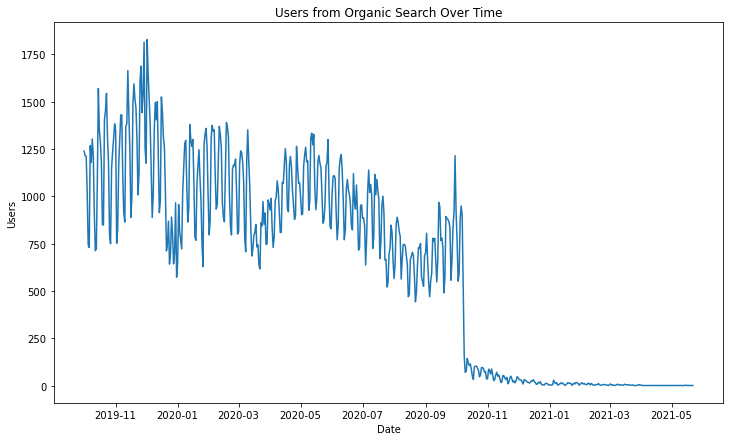

In [4]:
# subset organic searches
df_org = df[df['Default Channel Grouping'] == 'Organic Search']
# sort by date
df_org = df_org.sort_values(by='Date')
# plot organic search over time
plt.figure(figsize=(12,7))
plt.plot(df_org['Date'], df_org['Users'])
plt.xlabel('Date')
plt.ylabel('Users')
plt.title('Users from Organic Search Over Time')
plt.show()

A dummy variable indicating before or after (roughly) October 2020 seems like a reasonable introduction to make.

(c)

In [5]:
# find the exact date of the dropoff
df_org[(df_org['Date'] >= '2020-10-07') & (df_org['Date'] <= '2020-10-10')]

,Default Channel Grouping,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
585,Organic Search,2020-10-07,899,637,987,44.07%,4.67,0:03:10,0.10%,1.0,$21.00
776,Organic Search,2020-10-08,527,322,581,42.86%,4.64,0:02:44,0.17%,1.0,$96.60
1582,Organic Search,2020-10-09,156,0,188,31.91%,6.57,0:04:40,0.00%,0.0,$0.00
2182,Organic Search,2020-10-10,71,0,85,34.12%,6.66,0:03:47,0.00%,0.0,$0.00


In [6]:
# create indicator variable
df_org['I'] = (df_org['Date'] > '2020-10-08').astype(int)
# check indicator variable
df_org[(df_org['Date'] >= '2020-10-07') & (df_org['Date'] <= '2020-10-10')]

,Default Channel Grouping,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,I
585,Organic Search,2020-10-07,899,637,987,44.07%,4.67,0:03:10,0.10%,1.0,$21.00,0
776,Organic Search,2020-10-08,527,322,581,42.86%,4.64,0:02:44,0.17%,1.0,$96.60,0
1582,Organic Search,2020-10-09,156,0,188,31.91%,6.57,0:04:40,0.00%,0.0,$0.00,1
2182,Organic Search,2020-10-10,71,0,85,34.12%,6.66,0:03:47,0.00%,0.0,$0.00,1


In [10]:
# "test the hypothesis whether days where I=1 have more user traffic than days with I=0."
X = df_org['I']
y = df_org['Users'].values.reshape(553, 1)
# add constant so intercept is calculated too
X = sm.add_constant(X)
# run regression
lr = sm.OLS(y, X)
results = lr.fit()
# output results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2272.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          1.28e-197
Time:                        12:59:50   Log-Likelihood:                -3773.0
No. Observations:                 553   AIC:                             7550.
Df Residuals:                     551   BIC:                             7559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        989.7059     11.515     85.952      0.0

Direct


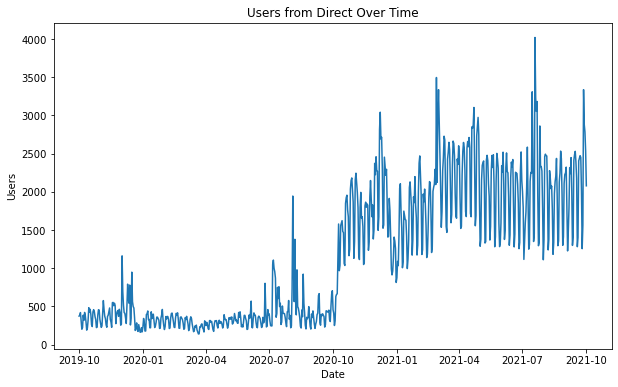

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2751.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          8.13e-250
Time:                        13:00:22   Log-Likelihood:                -5436.0
No. Observations:                 732   AIC:                         1.088e+04
Df Residuals:                     730   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        371.5134     21.041     17.657      0.0

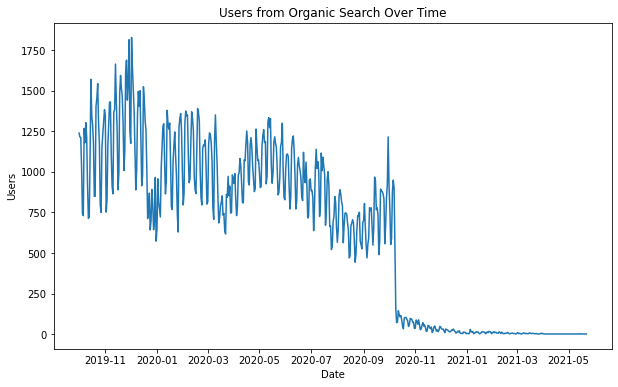

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2272.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          1.28e-197
Time:                        13:00:22   Log-Likelihood:                -3773.0
No. Observations:                 553   AIC:                             7550.
Df Residuals:                     551   BIC:                             7559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        989.7059     11.515     85.952      0.0

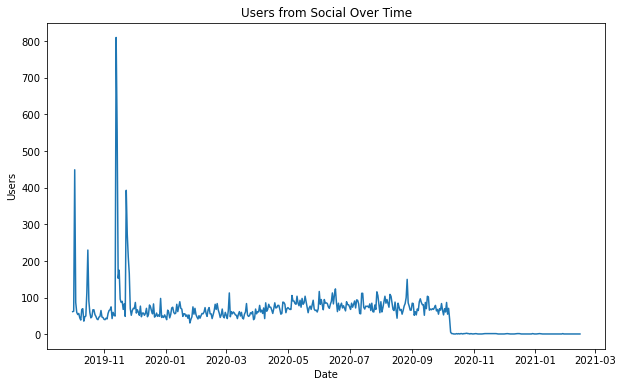

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     96.08
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.32e-20
Time:                        13:00:22   Log-Likelihood:                -2333.5
No. Observations:                 432   AIC:                             4671.
Df Residuals:                     430   BIC:                             4679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.8904      2.781     27.290      0.0

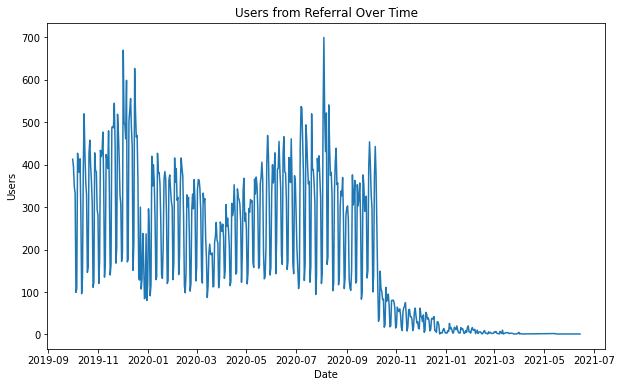

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     713.6
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          9.17e-101
Time:                        13:00:23   Log-Likelihood:                -3300.1
No. Observations:                 541   AIC:                             6604.
Df Residuals:                     539   BIC:                             6613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        293.2406      5.589     52.469      0.0

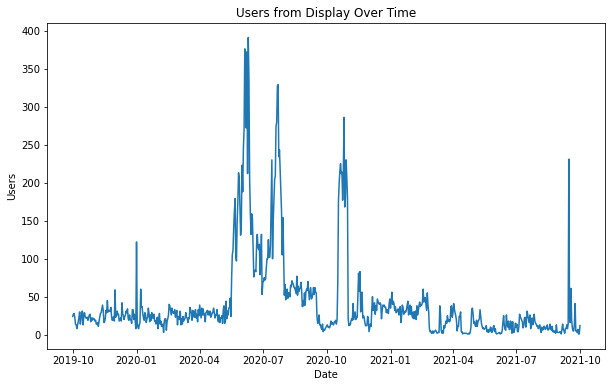

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     48.11
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           8.93e-12
Time:                        13:00:23   Log-Likelihood:                -3955.3
No. Observations:                 726   AIC:                             7915.
Df Residuals:                     724   BIC:                             7924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.5481      2.911     19.428      0.0

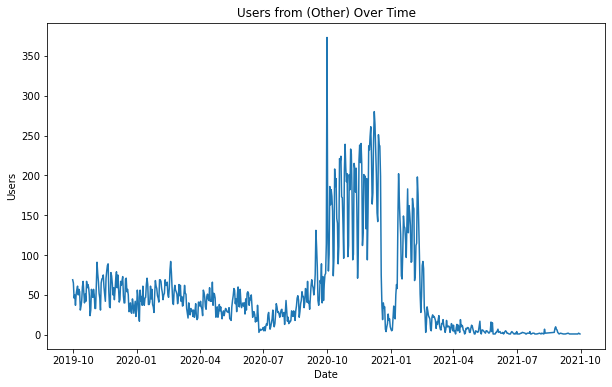

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     13.33
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           0.000281
Time:                        13:00:23   Log-Likelihood:                -3720.0
No. Observations:                 678   AIC:                             7444.
Df Residuals:                     676   BIC:                             7453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4638      3.030     15.336      0.0

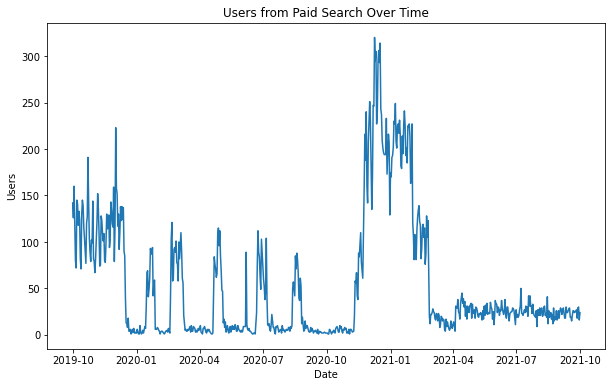

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     25.21
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           6.49e-07
Time:                        13:00:24   Log-Likelihood:                -4051.7
No. Observations:                 723   AIC:                             8107.
Df Residuals:                     721   BIC:                             8117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3415      3.439     12.312      0.0

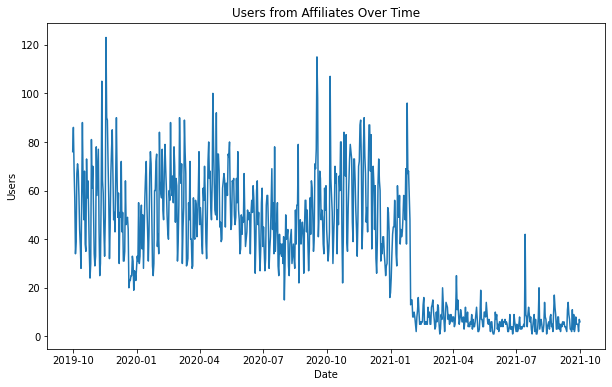

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     358.8
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           2.28e-65
Time:                        13:00:24   Log-Likelihood:                -3269.4
No. Observations:                 731   AIC:                             6543.
Df Residuals:                     729   BIC:                             6552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.4412      1.097     46.880      0.0

In [12]:
# function to run univariate regression and output results given some data, independent variable, and dependent variable
def ols_output(df, ind_var, dep_var):
    
    X = df[ind_var]
    y = df[dep_var]
    X = sm.add_constant(X)
    lr = sm.OLS(y, X)
    results = lr.fit()
    return results.summary()

# add indicator variable to entire dataframe
df['I'] = (df['Date'] > '2020-10-08').astype(int)

# test hypothesis for all acquisition channels
for channel in df['Default Channel Grouping'].unique():
    
    print(channel)
    df_curr = (df[df['Default Channel Grouping'] == channel]).sort_values(by='Date')
    plt.figure(figsize=(10,6))
    plt.plot(df_curr['Date'], df_curr['Users'])
    plt.xlabel('Date')
    plt.ylabel('Users')
    plt.title(f'Users from {channel} Over Time')
    plt.show()
    print(ols_output(df_curr, 'I', 'Users'))
    print('\n'*2)
    